Hysteresis Test

Mål: Teste hysteresis ved 3 forskellieg på/aftanging af vægte, For hver modstand. 


Fejl... Vægtende er ikke stackable.. de vælter og jeg har ikke mulighed for at reprodicere til sammenligning. 
så for at vise pointen er der er en (to) ful test. 



# 10kohm: Round 1

## Test1

119 -> 149.92 -> 180.04 -> 212.49



Mean analogRead: 1657.94
Standardafvigelse: 174.26
Relative standard deviation: 10.51%


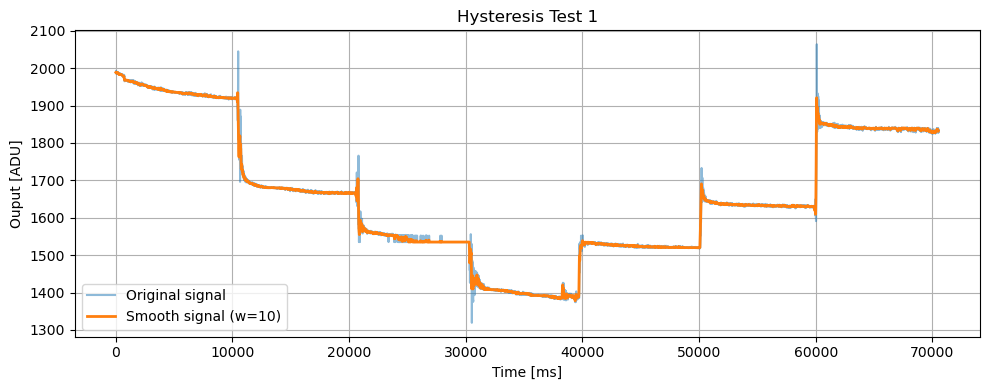

In [50]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_1st/Test1.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# Beregn og print statistik
mean_analogTest1 = np.mean(signal1)
std_dev0Test1 = np.std(signal1)
print(f"Mean analogRead: {mean_analogTest1:.2f}")
print(f"Standardafvigelse: {std_dev0Test1:.2f}")
print(f"Relative standard deviation: {100 * np.std(signal1) / np.mean(signal1):.2f}%")


# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Original signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Smooth signal (w=10)", linewidth=2)
plt.xlabel("Time [ms]")
plt.ylabel("Ouput [ADU]")
plt.title("Hysteresis Test 1")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysreresis Curve

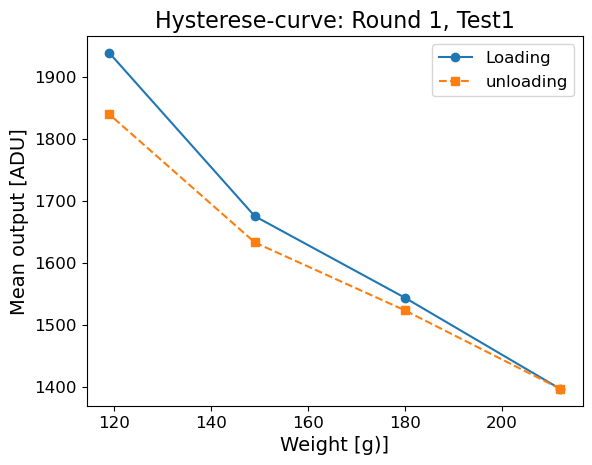

[np.float64(1938.4941666666666), np.float64(1675.575), np.float64(1544.0566666666666), np.float64(1397.365)]
[np.float64(1397.365), np.float64(1523.7408333333333), np.float64(1633.2766666666666), np.float64(1839.575)]
Hysteresis (datasheet formula):
  At 119g: 5.1029 %
  At 149g: 2.5244 %
  At 180g: 1.3157 %
  At 212g: 0.0000 %


In [51]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '149g', '180g', '212g', '180g', '149g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 149, 180, 212], means[:4], 'o-', label='Loading')
plt.plot([212, 180, 149, 119], means[3:], 's--', label='unloading')
plt.title('Hysterese-curve: Round 1, Test1', fontsize=16)
plt.xlabel('Weight [g)]', fontsize=14)
plt.ylabel('Mean output [ADU]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 149, 180, 212]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 212 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")


## Test2

119 -> 231.47 -> 327.81 -> 404.06



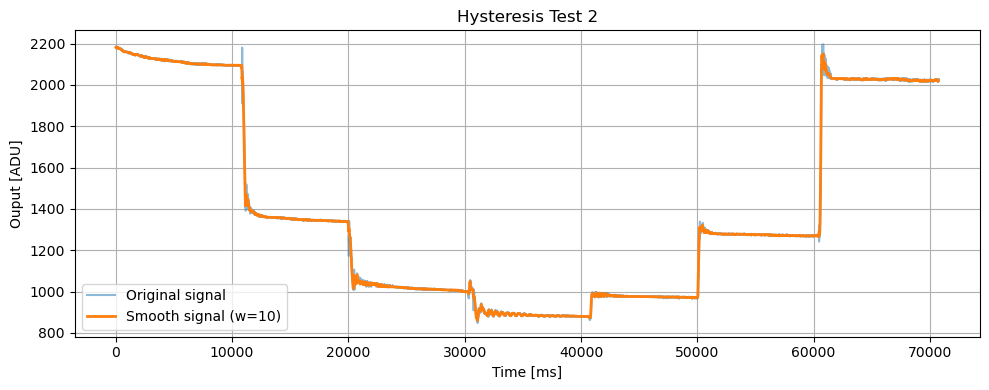

In [52]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_1st/Test2.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Original signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Smooth signal (w=10)", linewidth=2)
plt.xlabel("Time [ms]")
plt.ylabel("Ouput [ADU]")
plt.title("Hysteresis Test 2")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

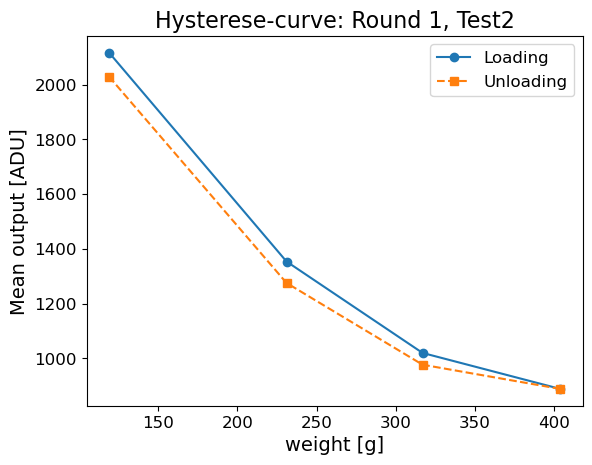

[np.float64(2116.1041666666665), np.float64(1353.7983333333334), np.float64(1019.6283333333333), np.float64(888.165)]
[np.float64(888.165), np.float64(976.6808333333333), np.float64(1275.4275), np.float64(2028.2441666666666)]
Hysteresis (datasheet formula):
  At 19g: 4.1520 %
  At 231g: 5.7890 %
  At 317g: 4.2121 %
  At 404g: 0.0000 %


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '231g', '317g', '404g', '317g', '231g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 231, 317, 404], means[:4], 'o-', label='Loading')
plt.plot([404, 317, 231, 119], means[3:], 's--', label='Unloading')
plt.xlabel('weight [g]', fontsize=14)
plt.ylabel('Mean output [ADU]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Hysterese-curve: Round 1, Test2', fontsize=16)
plt.show()

# Vægte og middelværdier fra tidligere
weights = [19, 231, 317, 404]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 404 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")



## Test3

119 -> 282.73 -> 545.21 -> 870.64



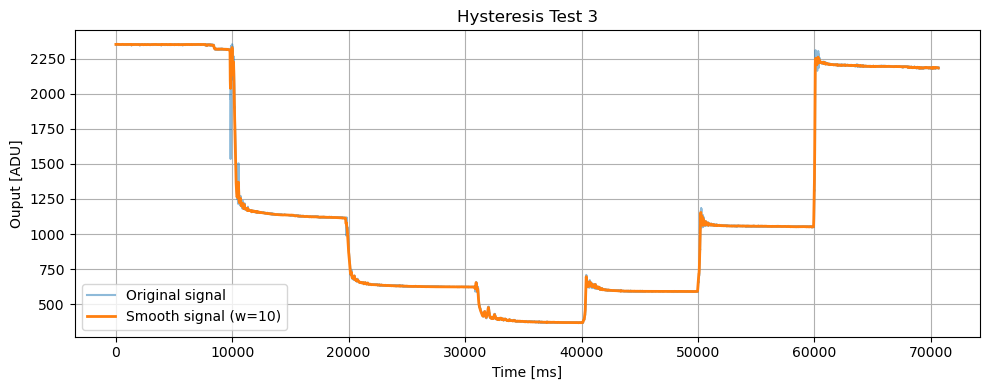

In [55]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_1st/Test3.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Original signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Smooth signal (w=10)", linewidth=2)
plt.xlabel("Time [ms]")
plt.ylabel("Ouput [ADU]")
plt.title("Hysteresis Test 3")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

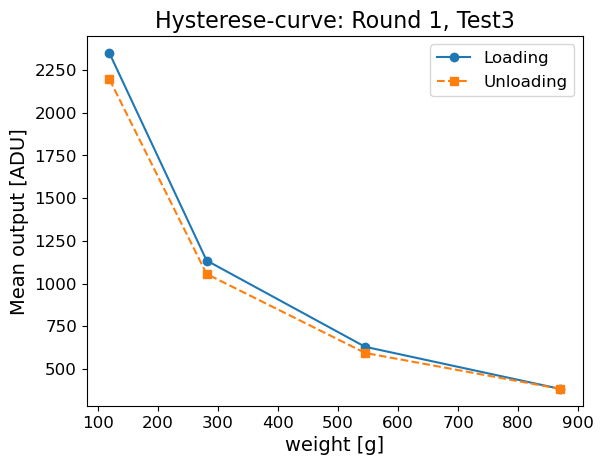

[np.float64(2349.78), np.float64(1134.795), np.float64(629.8633333333333), np.float64(383.2183333333333)]
[np.float64(383.2183333333333), np.float64(593.8558333333333), np.float64(1056.185), np.float64(2196.4258333333332)]
Hysteresis (datasheet formula):
  At 119g: 6.5263 %
  At 281g: 6.9272 %
  At 545g: 5.7167 %
  At 870g: 0.0000 %


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '281g', '545g', '870g', '545g', '281g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 281, 545, 870], means[:4], 'o-', label='Loading')
plt.plot([870, 545, 281, 119], means[3:], 's--', label='Unloading')
plt.xlabel('weight [g]', fontsize=14)
plt.ylabel('Mean output [ADU]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Hysterese-curve: Round 1, Test3', fontsize=16)
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 281, 545, 870]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 870 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")



## Test 4

119 -> 656.99 -> 1143.52 -> 1565.29


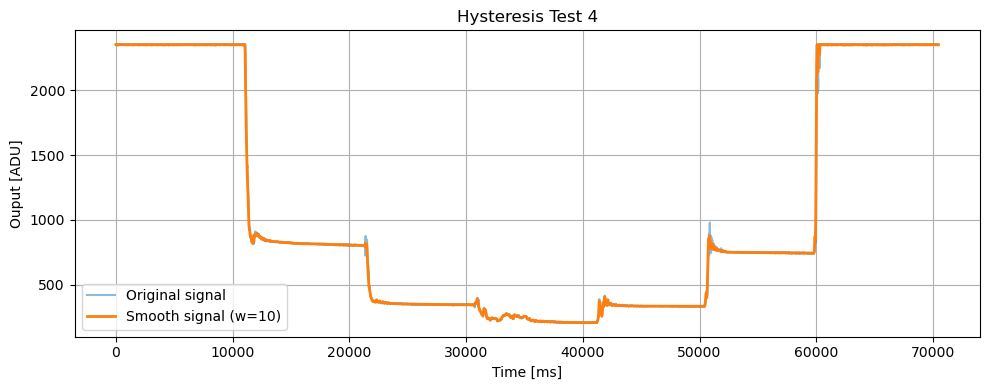

In [58]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_1st/Test4.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Original signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Smooth signal (w=10)", linewidth=2)
plt.xlabel("Time [ms]")
plt.ylabel("Ouput [ADU]")
plt.title("Hysteresis Test 4")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

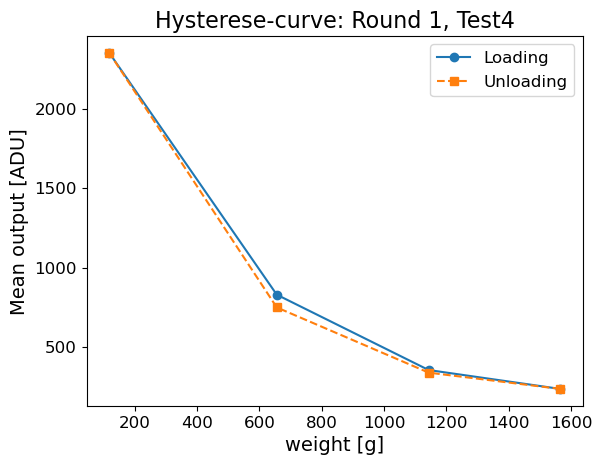

[np.float64(2350.225), np.float64(829.5616666666666), np.float64(355.6358333333333), np.float64(236.79583333333332)]
[np.float64(236.79583333333332), np.float64(339.2966666666667), np.float64(749.3525), np.float64(2350.0216666666665)]
Hysteresis (datasheet formula):
  At 119g: 0.0087 %
  At 656g: 9.6689 %
  At 1143g: 4.5944 %
  At 1565g: 0.0000 %


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '656g', '1143g', '1565g', '1143g', '656g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 656, 1143, 1565], means[:4], 'o-', label='Loading')
plt.plot([1565, 1143, 656, 119], means[3:], 's--', label='Unloading')
plt.xlabel('weight [g]', fontsize=14)
plt.ylabel('Mean output [ADU]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Hysterese-curve: Round 1, Test4', fontsize=16)
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 656, 1143, 1565]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 1565 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")



# 10kohm: Round 2

## Test1

119 -> 149.92 -> 180.04 -> 212.49



Mean analogRead: 1943.03
Standardafvigelse: 346.97
Relative standard deviation: 17.86%


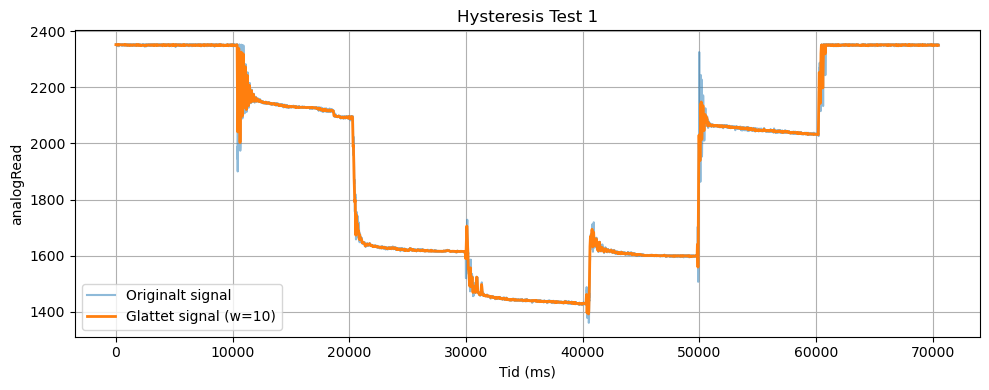

In [108]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_2nd/Test1.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# Beregn og print statistik
mean_analogTest1 = np.mean(signal1)
std_dev0Test1 = np.std(signal1)
print(f"Mean analogRead: {mean_analogTest1:.2f}")
print(f"Standardafvigelse: {std_dev0Test1:.2f}")
print(f"Relative standard deviation: {100 * np.std(signal1) / np.mean(signal1):.2f}%")


# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Originalt signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Glattet signal (w=10)", linewidth=2)
plt.xlabel("Tid (ms)")
plt.ylabel("analogRead")
plt.title("Hysteresis Test 1")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

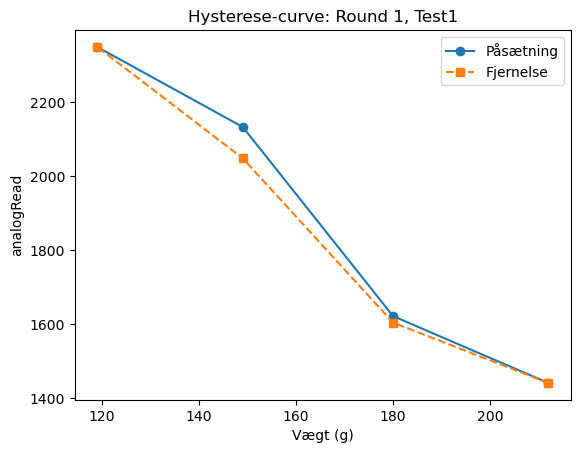

[np.float64(2350.0466666666666), np.float64(2133.704166666667), np.float64(1622.5016666666668), np.float64(1441.9366666666667)]
[np.float64(1441.9366666666667), np.float64(1604.9666666666667), np.float64(2048.994166666667), np.float64(2350.1758333333332)]
Hysteresis (datasheet formula):
  At 119g: -0.0055 %
  At 281g: 3.9701 %
  At 545g: 1.0807 %
  At 870g: 0.0000 %


In [109]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '149g', '180g', '212g', '180g', '149g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 149, 180, 212], means[:4], 'o-', label='Påsætning')
plt.plot([212, 180, 149, 119], means[3:], 's--', label='Fjernelse')
plt.xlabel('Vægt (g)')
plt.ylabel('analogRead')
plt.legend()
plt.title('Hysterese-curve: Round 1, Test1')
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 281, 545, 870]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 870 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")


## Test2

119 -> 231.47 -> 327.81 -> 404.06



Mean analogRead: 1503.49
Standardafvigelse: 609.04
Relative standard deviation: 40.51%


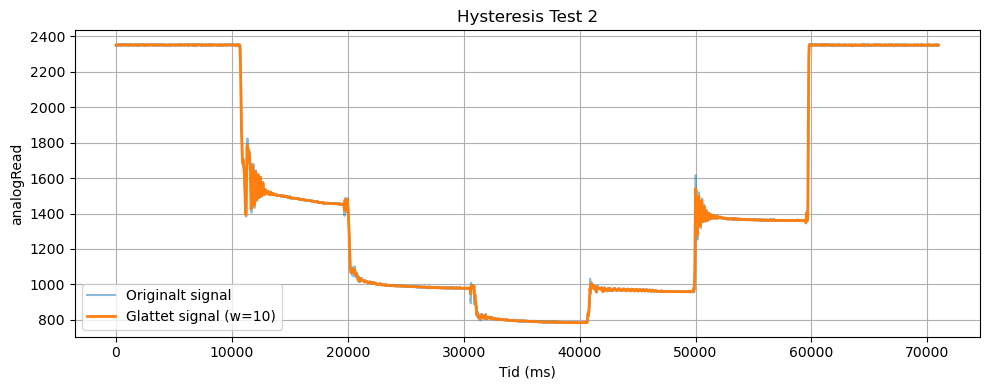

In [110]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_2nd/Test2.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# Beregn og print statistik
mean_analogTest2 = np.mean(signal1)
std_devTest2 = np.std(signal1)
print(f"Mean analogRead: {mean_analogTest2:.2f}")
print(f"Standardafvigelse: {std_devTest2:.2f}")
print(f"Relative standard deviation: {100 * np.std(signal1) / np.mean(signal1):.2f}%")


# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Originalt signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Glattet signal (w=10)", linewidth=2)
plt.xlabel("Tid (ms)")
plt.ylabel("analogRead")
plt.title("Hysteresis Test 2")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

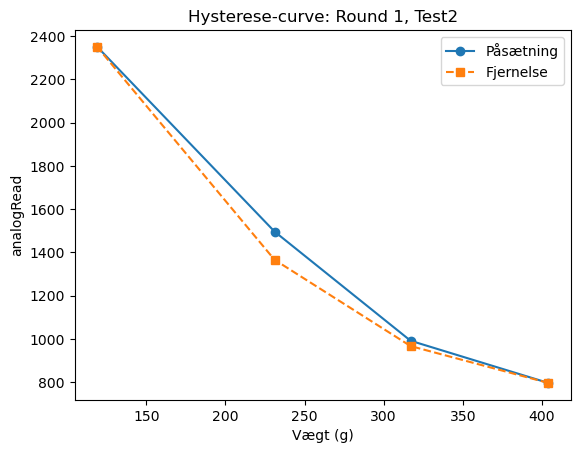

[np.float64(2349.9991666666665), np.float64(1496.2241666666666), np.float64(991.1941666666667), np.float64(796.1533333333333)]
[np.float64(796.1533333333333), np.float64(966.5733333333334), np.float64(1365.7016666666666), np.float64(2349.3741666666665)]
Hysteresis (datasheet formula):
  At 119g: 0.0266 %
  At 281g: 8.7235 %
  At 545g: 2.4840 %
  At 870g: 0.0000 %


In [111]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '231g', '317g', '404g', '317g', '231g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 231, 317, 404], means[:4], 'o-', label='Påsætning')
plt.plot([404, 317, 231, 119], means[3:], 's--', label='Fjernelse')
plt.xlabel('Vægt (g)')
plt.ylabel('analogRead')
plt.legend()
plt.title('Hysterese-curve: Round 1, Test2')
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 281, 545, 870]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 870 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")



## Test3

119 -> 282.73 -> 545.21 -> 870.64



Mean analogRead: 1214.24
Standardafvigelse: 688.84
Relative standard deviation: 56.73%


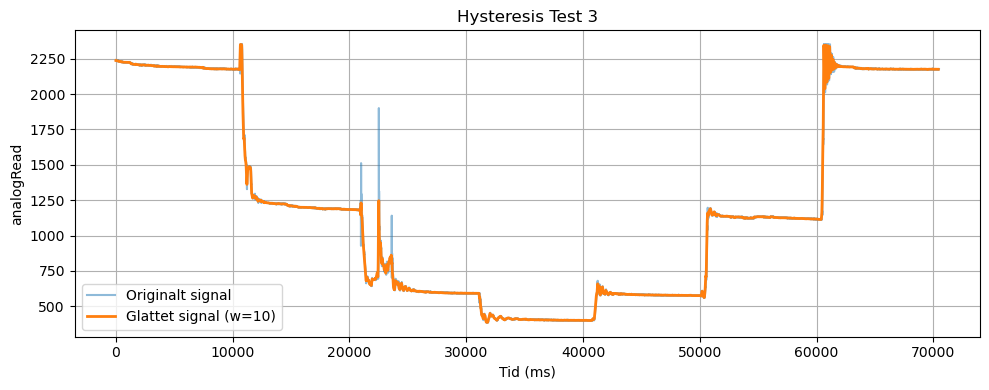

In [112]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_2nd/Test3.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# Beregn og print statistik
mean_analogTest3 = np.mean(signal1)
std_devTest3 = np.std(signal1)
print(f"Mean analogRead: {mean_analogTest3:.2f}")
print(f"Standardafvigelse: {std_devTest3:.2f}")
print(f"Relative standard deviation: {100 * np.std(signal1) / np.mean(signal1):.2f}%")


# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Originalt signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Glattet signal (w=10)", linewidth=2)
plt.xlabel("Tid (ms)")
plt.ylabel("analogRead")
plt.title("Hysteresis Test 3")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

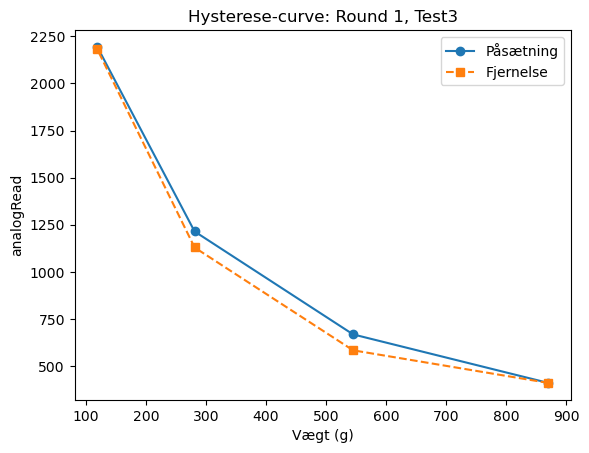

[np.float64(2194.035), np.float64(1214.3658333333333), np.float64(667.8383333333334), np.float64(410.205)]
[np.float64(410.205), np.float64(583.3358333333333), np.float64(1129.1791666666666), np.float64(2180.8791666666666)]
Hysteresis (datasheet formula):
  At 119g: 0.5996 %
  At 281g: 7.0149 %
  At 545g: 12.6531 %
  At 870g: 0.0000 %


In [113]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '281g', '545g', '870g', '545g', '281g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 281, 545, 870], means[:4], 'o-', label='Påsætning')
plt.plot([870, 545, 281, 119], means[3:], 's--', label='Fjernelse')
plt.xlabel('Vægt (g)')
plt.ylabel('analogRead')
plt.legend()
plt.title('Hysterese-curve: Round 1, Test3')
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 281, 545, 870]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 870 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")



## Test 4

119 -> 656.99 -> 1143.52 -> 1565.29


Mean analogRead: 964.20
Standardafvigelse: 921.97
Relative standard deviation: 95.62%


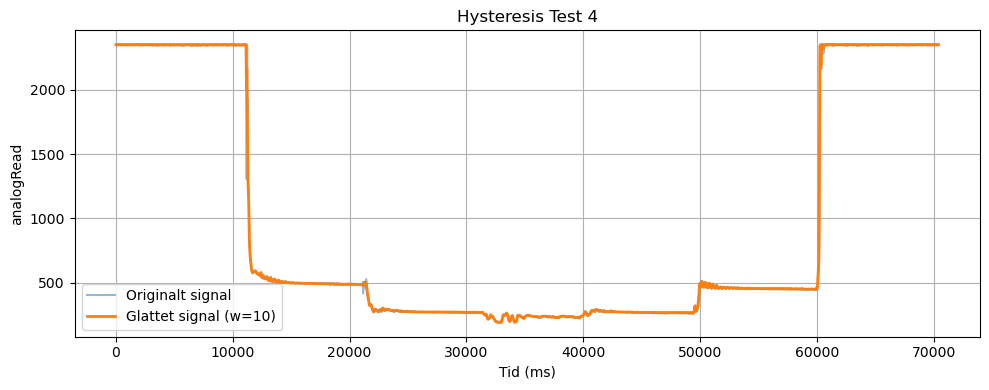

In [114]:

import numpy as np
import matplotlib.pyplot as plt

#Indlæs data
file_path = "/Users/linnthomsen/Desktop/Skole/DTU/6thSemester/BA/FSR_software/Mass_FSR_analog/Hysteresis/10kohm/10kohm_2nd/Test4.txt"
data1 = np.loadtxt(file_path, delimiter=",")
time_ms1 = data1[:, 0]
signal1 = data1[:, 1]
#voltage= data1[:, 2]

# Beregn og print statistik
mean_analogTest4 = np.mean(signal1)
std_devTest4 = np.std(signal1)
print(f"Mean analogRead: {mean_analogTest4:.2f}")
print(f"Standardafvigelse: {std_devTest4:.2f}")
print(f"Relative standard deviation: {100 * np.std(signal1) / np.mean(signal1):.2f}%")


# >>> Her indsætter du moving average-funktionen:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

smooth = moving_average(signal1, 10)

# Tid skal forkortes tilsvarende (fordi signalet bliver kortere)
time_smooth = time_ms1[:len(smooth)]

# Plot originalt og glattet signal
plt.figure(figsize=(10, 4))
plt.plot(time_ms1, signal1, label="Originalt signal", alpha=0.5)
plt.plot(time_smooth, smooth, label="Glattet signal (w=10)", linewidth=2)
plt.xlabel("Tid (ms)")
plt.ylabel("analogRead")
plt.title("Hysteresis Test 4")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Hysteresis Curve

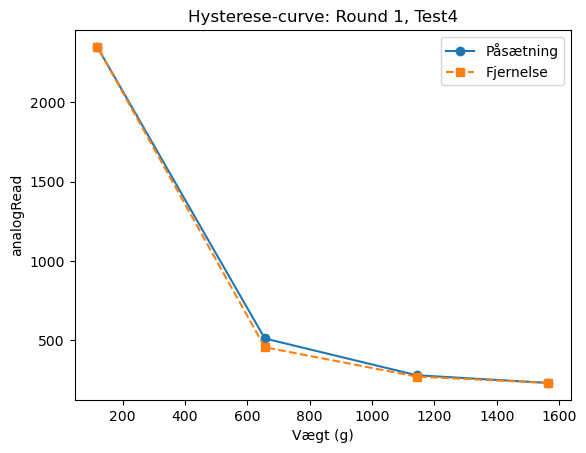

[np.float64(2349.2275), np.float64(509.9025), np.float64(277.73583333333335), np.float64(229.3625)]
[np.float64(229.3625), np.float64(269.28583333333336), np.float64(454.5341666666667), np.float64(2349.6141666666667)]
Hysteresis (datasheet formula):
  At 119g: -0.0165 %
  At 281g: 10.8586 %
  At 545g: 3.0425 %
  At 870g: 0.0000 %


In [115]:
import numpy as np
import matplotlib.pyplot as plt

# antag at du har: time, analog_values
step_times = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000]  # i ms
step_labels = ['0g', '119g', '656g', '1143g', '1565g', '1143g', '656g', '119g']

# Brug middelværdi fra hver step
means = []
for i in range(len(step_times) - 1):
    mask = (time_ms1 > step_times[i] + 2000) & (time_ms1 < step_times[i+1] - 2000)  # undgå overgang
    means.append(np.mean(signal1[mask]))

# Plot "op" vs. "ned"
plt.plot([119, 656, 1143, 1565], means[:4], 'o-', label='Påsætning')
plt.plot([1565, 1143, 656, 119], means[3:], 's--', label='Fjernelse')
plt.xlabel('Vægt (g)')
plt.ylabel('analogRead')
plt.legend()
plt.title('Hysterese-curve: Round 1, Test4')
plt.show()

# Vægte og middelværdier fra tidligere
weights = [119, 281, 545, 870]
means_up = means[0:4]
print(means_up)
means_down = means[3:]  # 870 → 119g
print(means_down)

# Vend ned-målinger så rækkefølgen matcher op-målinger
means_down_reversed = means_down[::-1]

# Udskriv hysterese i procent baseret på datasheet-formlen
print("Hysteresis (datasheet formula):")
for i in range(4):
    up = means_up[i]      # R_F+
    down = means_down_reversed[i]  # R_F-
    hyst = (up - down) / up * 100  # (R_F+ - R_F-) / R_F+ * 100
    print(f"  At {weights[i]}g: {hyst:.4f} %")

